### How to represent words?

* The first and arguably most important common denominator across all NLP tasks is how we represent words as input to any of our models. 


* To perform well on most NLP tasks we first need to have some notion of similarity and difference between words.


* With word vectors, we can quite easily encode this ability in the vectors themselves (using distance measures such as Jaccard, Cosine, Euclidean, etc).


### Word vectors 

* The attempt to find a N-dimensional space(such that N << vocabulary size), that is sufficient to encode all the semantics of a language. 


* Each dimension would encode some meaning that we transfer using speech.


* For instance, semantic dimensions might indicate tense (past vs. present vs. future), count (singular vs. plural), and gender (masculine vs. feminine)

1) The **one-hot vector**: 

* Represent every word as an $R^{|V|×1}$ vector with all 0s and one 1 at the index of that word in the sorted english language.

* In this notation, |V| is the size of our vocabulary


* We represent each word as a completely independent entity. 


* This word representation does not give us directly any notion of similarity. 
    
    $(w^{hotel})^T.w^{motel} = (w^{hotel})^T.w^{cat} = 0$ 
    
   this is because every unique words is **orthogonal** to every other word


**Fun fact:** 

The term "one-hot" comes from digital circuit design, meaning "a group of bits among which the legal combinations of values are only those with a single high (1) bit and all the others low (0)".

**Denotational semantics:** 

The concept of representing an **idea** as a **symbol** (a word or a one-hot vector). It is sparse and cannot capture similarity. This is a **"localist" representation**.

**Distributional semantics:**

The concept of representing the meaning of a word based on the context in which it usually appears. It is dense and can better capture similarity.

<hr>

### SVD based methods

**SVD(Singular Value Decomposition):**
* Singular Value Decomposition is a matrix factorization method for a real or complex matrix. 


* It factorizes a matrix into 3 matrices, **US$V^T$**


* It is the generalization of the eigendecomposition of a positive semidefinite normal matrix (for example, a symmetric matrix with positive eigenvalues) to any matrix via an extension of the polar decomposition.

For this class of methods to **find word embeddings** (otherwise known as word vectors), we **first loop over a massive dataset** and **accumulate word co-occurrence counts** in some form of a matrix **X**, and then **perform Singular Value Decomposition on X** to **get a US$V^T$ decomposition**. We then **use the rows of U as the word embeddings** for all words in our dictionary

**Choices for X - representation of word co-occurence**

**1. Word-Document matrix:**

* We make the bold assumption of related words to appear in the same documents.


* We build X by looping over all the documents j and each time word i appears in it, we add one to $X_{ij}$


* This is of dimension $R^{|V|×M}$ and increases with document size **M** ( assuming vocabulary is fixed)


**2. Window based Co-occurrence Matrix:**

* The same kind of logic applies here however, the matrix X stores co-occurrences of words thereby becoming an affinity matrix. 


* In this method we count the number of times each word appears inside a window of a particular size around the word of interest.


* We calculate this count for all the words in corpus.

#### Applying SVD to the co-occurence matrix

**Using Word-Word Co-occurrence Matrix:**

* Generate |V| × |V| co-occurrence matrix, X.

* Apply SVD on X to get $X = USV^T$

* Select the first k columns of U to get a **k-dimensional** word vectors.

* <p> <span style="font-size:20px">$\frac{\Sigma_{i=1}^k \sigma_i}{\Sigma_{i=1}^{|V|} \sigma_i}$</span> $\sigma_i$ is the $i^{th}$ diagonal element of matrix S</p> indicates the amount of variance captured by the first k dimensions.

**ie**

We perform SVD on X, observe the singular values (the diagonal entries in the resulting S matrix), and cut them off at some index k based on the desired percentage variance captured:
<p style="font-size:20px;text-align:center">$\frac{\Sigma_{i=1}^k \sigma_i}{\Sigma_{i=1}^{|V|} \sigma_i}$</p>

We then take the submatrix of $U_{1:|V|,1:k}$ ie **|V| x k** matrix, to be our word embedding matrix. This would thus give us a k-dimensional representation of every word in the vocabulary

<img src="../Screenshots/Screenshot (721).png">
<img src="../Screenshots/Screenshot (722).png">

**Read Lecture 1 notes**

** Word2Vec note map [here](https://myndbook.com/view/4900) and [here](https://myndbook.com/view/4914)**

<hr>

### Gensim word vector visualization of various word vectors

In [1]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile;
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.scripts.glove2word2vec import get_glove_info

C:\Users\nabhu\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


For looking at word vectors, I'll use Gensim. We also use it in hw1 for word vectors. Gensim isn't really a deep learning package. It's a package for word and text similarity modeling, which started with (LDA-style) topic models and grew into SVD and neural word representations. But its efficient and scalable, and quite widely used.

Our homegrown Stanford offering is GloVe word vectors. Gensim doesn't give them first class support, but allows you to convert a file of GloVe vectors into word2vec format. You can download the GloVe vectors from the [Glove page](https://nlp.stanford.edu/projects/glove/). They're inside this [zip file](https://nlp.stanford.edu/data/glove.6B.zip).

(I use the 100d vectors below as a mix between speed and smallness vs. quality. If you try out the 50d vectors, they basically work for similarity but clearly aren't as good for analogy problems. If you load the 300d vectors, they're even better than the 100d vectors.)

**SVD(Singular Value Decomposition):**
* Singular Value Decomposition is a matrix factorization method for a real or complex matrix. 


* It factorizes a matrix into 3 matrices


* It is the generalization of the eigendecomposition of a positive semidefinite normal matrix (for example, a symmetric matrix with positive eigenvalues) to any matrix via an extension of the polar decomposition.

In [2]:
# glove word vector path
# to get full path of data in gensim/test/test_data use
# >>> datapath("glove.6B.100d.txt")
glove_file = r"D:\Projects\dataset\nlp\datasets\glove.6B\glove.6B.100d.txt"

# get path to temporary file
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")

# Get number of vectors in provided glove_file_name and dimension of vectors.
#print(get_glove_info(glove_file))

# convert glove format to word2vec format
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 100)

#### gensim.models.KeyedVectors

* This module implements word vectors and their similarity look-ups.


* Since trained word vectors are independent from the way they were trained (Word2Vec, FastText, WordRank, VarEmbed etc), they can be represented by a standalone structure, as implemented in this module.


* The structure is called “KeyedVectors” and is essentially a mapping between entities and vectors. Each entity is identified by its string id, so this is a mapping between {str => 1D numpy array}.


* The entity typically corresponds to a word (so the mapping maps words to 1D vectors), but for some models, the key can also correspond to a document, a graph node etc. To generalize over different use-cases, this module calls the keys entities. Each entity is always represented by its string id, no matter whether the entity is a word, a document or a graph node.

In [3]:
'''
Load the input-hidden weight matrix from the original C word2vec-tool format.

Parameter: The file path to the saved word2vec-format file
Returns: Loaded model
'''
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [4]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.9272854328155518),
 ('clinton', 0.8960003852844238),
 ('mccain', 0.8875634074211121),
 ('gore', 0.8000321388244629),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851964235305786),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488930225372314),
 ('kerry', 0.7472623586654663)]

In [84]:
model.most_similar('india')

[('pakistan', 0.8370324373245239),
 ('indian', 0.780203104019165),
 ('delhi', 0.7712194919586182),
 ('bangladesh', 0.7661640644073486),
 ('lanka', 0.7639287710189819),
 ('sri', 0.7506585121154785),
 ('australia', 0.704209566116333),
 ('malaysia', 0.6796302795410156),
 ('nepal', 0.6761943101882935),
 ('thailand', 0.6671633124351501)]

In [25]:
model.most_similar('banana')

[('coconut', 0.7097253799438477),
 ('mango', 0.7054824233055115),
 ('bananas', 0.6887733340263367),
 ('potato', 0.6629636287689209),
 ('pineapple', 0.6534532308578491),
 ('fruit', 0.6519854664802551),
 ('peanut', 0.6420576572418213),
 ('pecan', 0.6349173188209534),
 ('cashew', 0.629442036151886),
 ('papaya', 0.6246591210365295)]

In [26]:
model.most_similar(negative='banana')

[('keyrates', 0.7173939347267151),
 ('sungrebe', 0.7119239568710327),
 ('þórður', 0.7067720293998718),
 ('zety', 0.7056615352630615),
 ('23aou94', 0.6959497928619385),
 ('___________________________________________________________',
  0.694915235042572),
 ('elymians', 0.6945434808731079),
 ('camarina', 0.6927202939987183),
 ('ryryryryryry', 0.6905654072761536),
 ('maurilio', 0.6865653395652771)]

<img src="../Screenshots/queen-man-woman.png">

In [78]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

result = model.most_similar(positive=["paris", "india"], negative=["france"])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699
delhi: 0.8655


In [6]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [32]:
analogy('japan', 'japanese', 'australia')

'australian'

In [33]:
analogy('australia', 'beer', 'france')

'champagne'

In [34]:
analogy('obama', 'clinton', 'reagan')

'nixon'

In [36]:
analogy('tall', 'tallest', 'long')

'longest'

In [ ]:
analogy('good', 'fantastic', 'bad')

In [21]:
analogy('einstein', 'scientist', 'messi')

'playmaker'

In [38]:
# odd one out
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


In [52]:
print(len(model.vocab))
for i, key in enumerate(model.vocab.keys()):
    print(key, ":", model.vocab[key])
    if i == 10:
        break
print('')
print(key)
print(len(model[key])) # 100d wordvector
print(model[key])

400000
the : Vocab(count:400000, index:0)
, : Vocab(count:399999, index:1)
. : Vocab(count:399998, index:2)
of : Vocab(count:399997, index:3)
to : Vocab(count:399996, index:4)
and : Vocab(count:399995, index:5)
in : Vocab(count:399994, index:6)
a : Vocab(count:399993, index:7)
" : Vocab(count:399992, index:8)
's : Vocab(count:399991, index:9)
for : Vocab(count:399990, index:10)

for
100
[-1.4401e-01  3.2554e-01  1.4257e-01 -9.9227e-02  7.2536e-01  1.9321e-01
 -2.4188e-01  2.0223e-01 -8.9599e-01  1.5215e-01  3.5963e-02 -5.9513e-01
 -5.1635e-02 -1.4428e-02  3.5475e-01 -3.1859e-01  7.6984e-01 -8.7369e-02
 -2.4762e-01  6.5059e-01 -1.5138e-01 -4.2703e-01  1.8813e-01  9.1562e-02
  1.5192e-01  1.1303e-01 -1.5222e-01 -6.2786e-01 -2.3923e-01  9.6009e-02
 -4.6147e-01  4.1526e-01 -3.0475e-01  1.3710e-01  1.6758e-01  5.3301e-01
 -4.3658e-02  8.5924e-01 -4.1192e-01 -2.1394e-01 -5.1228e-01 -3.1945e-01
  1.2662e-01 -3.1510e-01  3.1429e-03  2.7129e-01  1.7328e-01 -1.3159e+00
 -4.2414e-01 -6.9126e-01  

In [56]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
    word_vectors = np.array([model[w] for w in words])
    
    twodim = PCA().fit_transform(word_vectors)[:, :2]
    
    plt.figure(figsize=(6, 6))
    plt.scatter(twodim[:, 0], twodim[:, 1], edgecolors='k', c='r')
    
    for word, (x, y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

<IPython.core.display.Javascript object>


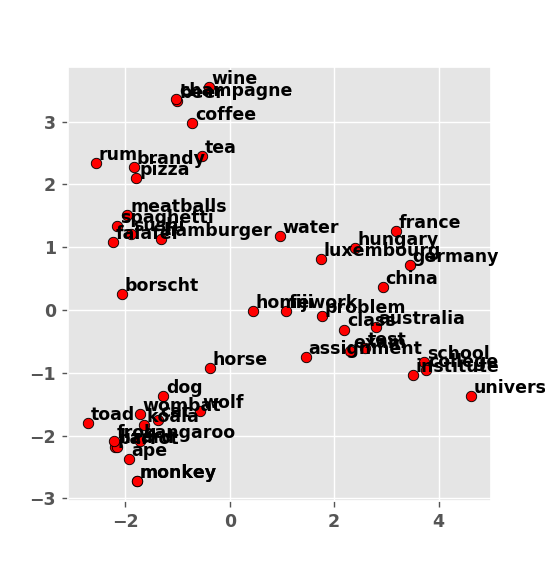

In [57]:
display_pca_scatterplot(model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

<IPython.core.display.Javascript object>


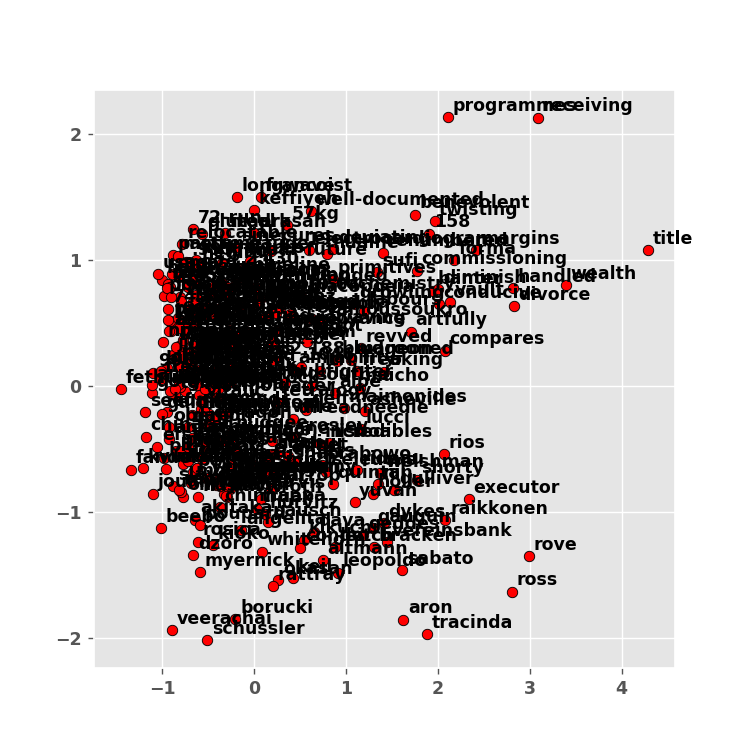

In [58]:
display_pca_scatterplot(model, sample=300)